## 12. Analise de series temporais usando transformada de Fourier


*" If you want to find the secrets of the universe, think in terms of energy, frequency and vibration."*
N. Tesla

### Series temporais

Uma série temporal é uma sequência de datos, típicamente sucesivos no tempo e tomados em intervalos uniformes. 
Aparecem em todo tipo de circumstâncias, desde a física, à biologia, economia, meteorologia, etc. 

Ex. 1: Número de manchas solar descrevendo o ciclo magnético solar


<img src="Figs/sunspots.png" width=50% >

Ex. 2 Evolução do preço do trigo no Leste europeio

<img src="Figs/wheat.png" width=50% >

Quase todo pode ser escrito como uma onda que é função do tempo, ou do espaço. E toda forma ondulatoria pode ser descrita pela suma de funções harmónicas simples com frequências diferentes.  Isto nos permite ter outra representação do sistema em termos de frequências.  

## Series de Fourier

Com a expansão em  série de Fourier é possivel representar qualquer função em termos de senos e cosenos.  A função a ser representada deve cumprir duas condições:

* ser periódica com período $T$
* deve ser integrável no período

Se essas duas condições são satisfeitas a função pode se expresar como:

$$
f(t) = a_0 + \sum_{k=1}^{\infty} \left[a_k \cos(2 \pi f k t) + b_n \sin(2 \pi f k t) \right]
$$

Essa aproximação é uma soma finita, logo, quanto maior $k$ melhor a representação de $f$.

Os coeficientes podem ser calculados como:

$$
a_0 = \int_0^T f(t)dt 
$$

$$
a_n = \frac{2}{T}  \int_{-T/2}^{T/2} f(t)  \cos(2 \pi f k t)  dt 
$$

$$
b_n = \frac{2}{T}  \int_{-T/2}^{T/2} f(t)  \sin(2 \pi f k t)  dt 
$$

O seguinte exemplo mostra como representar uma onda quadrada usando series de Fourier.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

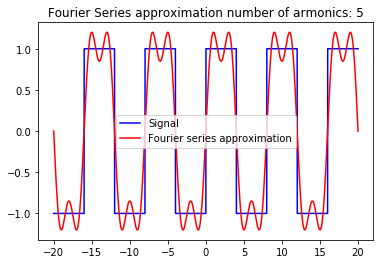

In [4]:
# Espaço
x_ = np.linspace(-20,20,10000)

T = 8
armonics = 5


# Funcao para construir a onda quadrada
def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Coeficientes,  Bn 
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Frequencias,  Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

### A transformada de Fourier

A trasnformada de Fourier decompoe qualquer função ondulatória em funçoes sinusoidais. Cada uma dessas funções é um exponencial complexo de uma frequência diferente.   

A transformada de Fourier de uma função $g(t)$  é definida como:

$$
G(f) = \int_{-\infty}^{\infty} g(t) e^{-2\pi i f t} dt
$$

Como se vé, o resultado, é uma função de $f$ (a frequência) e não de $t$, o tempo. $G(f)$ informa quanta poténcia tem $g(t)$ na frequência $f$. $G(f)$ é comunmente chamado de `espectro` de $g$.

A função $g(t)$ pode ser obtida de $G(f)$ a partir da transformada inversa de Fourier:

$$
g(t) = \int_{-\infty}^{\infty} G(f) e^{2\pi i f t} dt
$$

#### Exemplo: a função pulso

A função pulso tem amplitude $A$ entre $-T/2$ e $T/2$, e tem 

<img src="Figs/box.jpg" width=50% >

A transformada para a função pulso seria:

\begin{eqnarray}
G(f) &=& \int_{-\infty}^{\infty} g(t) e^{-2\pi i f t} dt \\
     &=& \int_{-T/2}^{T/2} A e^{-2\pi i f t} dt \\ &=& 
         -\frac{A}{ \pi  f} \frac{\left[e^{-\pi i f T} - e^{-\pi i f T}\right]}{2 i} \\ &=&
         AT \frac{\sin(\pi f T)}{\pi f T}
\end{eqnarray}

A função $G(f)$ como função de $f$ é apresentada na figura seguinte

<img src="Figs/sinc.jpg" width=50% >




## Transormada de Fourier discreta

É a transformada de Fourier de um número finito de pontos amostrados.  Suponha que a grandeça $g(t)$ foi medida $N$ vezes a intervalos de tempo uniformes:

$$
g_k = g (t_k) \; \; t_k =  k  \Delta t \;, \; {\rm com}\;\; k = 0,1,2,\ldots, N-1
$$

O intervalo de amostragem é $\Delta t$.  

Com $N$ valores medidos, evidentemente não poderemos ter mais do que $N$ valores para $G(f_k0)$.  Assim em lugar de estimar a transformada de Fourier para todas as frequências no intervalo $-\infty$ a $\infty$,  ou entre dois valores de frequências, $-f_c$ a $f_c$, vamos a estimar a transformada só em frequências discretas:

$$
    f_n = \frac{n}{N \Delta t} \;, \;   {\rm com}\;\; n = -\frac{N}{2}, \ldots, \frac{N}{2}
$$

Assim, a transformada de Fourier será


\begin{eqnarray}
G(f_n) &=& \int_{-\infty}^{\infty} g(t) e^{-2\pi i f_n t} dt \\
       &\simeq& \sum_{k=0}^{N-1} g_k e^{-2\pi i f_n t_k} \Delta t \\
       &=& \Delta t \sum_{k=0}^{N-1} g_k e^{-2\pi i k n / N} 
\end{eqnarray}

A transformada inversa, que recupera o conjunto de $g_k$, dos $G_n$ é

$$
g_k = \frac{1}{N} \sum_{n=0}^{N-1} G_n  e^{ 2\pi i k n / N}
$$


Essas transformadas podem ser usadas para passar do espaço físico do tempo ao espaço das frequências, e viceversa.

## Transformada rápida de Fourier (FFT)

O custo computacional de realizar a transformada discreta de Fourier é da ordem de ${\cal O}(N^2)$. No entanto, um 
algoritmo sofisticado, chamado transformada rápida de Fourier (FFT), desenvolvido por Danielson & Lanczos em 1942, permite realizar a mesma transformada em ${\cal O}(N \log_2 N)$. Computacionalmente isto faz uma diferencia enorme 
no tempo de cómputo.  As bibliotecas `numpy` e `scipy` possuem versões deste algoritmo. 

Por ora não vamos entrar nos detalhes do algoritmo para construir a FFT.  Vamos a utilizar a biblioteca  [scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html).






## Exemplos de transformada de Fourier, using `scipy.fftpack`



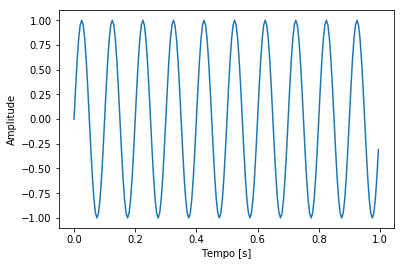

In [6]:
%matplotlib inline
f = 10  # Frequencia em ciclos por segundo  (Hertz)
f_s = 100  # Taxa de amostragem

t = np.linspace(0, 1, 2 * f_s, endpoint=False) # tempo
x = np.sin(f * 2 * np.pi * t)                  # sinal

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Amplitude');

Value at index 0:	(2.2840091972189664e-14+1.8563287995161733e-14j) 
Value at index 199:	(2.2840091972189664e-14-1.8563287995161733e-14j)
Value at index 1:	(-4.388959233867568e-14+3.2285272947894115e-14j) 
Value at index 198:	(-4.388959233867568e-14-3.2285272947894115e-14j)


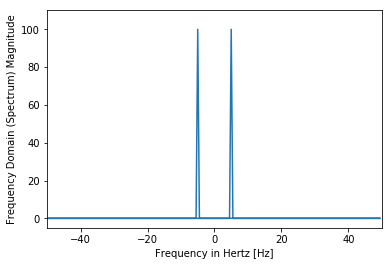

In [17]:
# Utilizamos a biblioteca fftpack de scipy
from scipy import fftpack

# Transformada de fourier de x
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)
for i in range(2):
    print("Value at index {}:\t{}".format(i, X[i + 1]), "\nValue at index {}:\t{}".format(X.size -1 - i, X[-1 - i]))

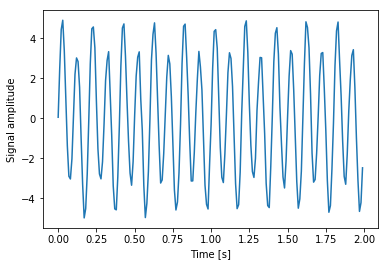

In [22]:
%matplotlib inline
f1 = 10  # Frequencia 1
f2 = 5   # Frequencia 2
f_s = 100  # Numero de medidas por segundo

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x1 = 4.*np.sin(f1 * 2 * np.pi * t)
x2 = np.sin(f2 * 2 * np.pi * t)
noise = np.random.normal (0, 0.2, 2*f_s)

fig, ax = plt.subplots()
x = x1+x2+noise
ax.plot(t,x)
#ax.plot(t,x1+x2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-5, 550)

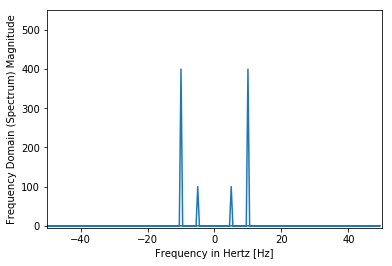

In [27]:
X = fftpack.fft(x1+x2)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 550)

## Atividade: ciclo de manchas solares

Utilize o arquivo `spot_num.txt` que se encontra dentro da pasta `data` no repositorio para graficar o numero de manchas solares como função do tempo.  Fazendo uso do pacote `scipy.fftpack` calcule o período do ciclo de manchas. Note que as medições são feitas a cada més. 